In [26]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [27]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [28]:
plt.rc("font", family="Malgun Gothic")

In [29]:
dead_rate_sql = """
    SELECT
        age_group,
        (SUM(dead_2018) + SUM(dead_2019) + SUM(dead_2020) + SUM(dead_2021) + SUM(dead_2022)) / (SUM(total_2019) + SUM(total_2019) + SUM(total_2020) + SUM(total_2021) + SUM(total_2022)) * 100 AS dead_rate
    FROM
        `calcium-channel-428804-c3.traffic_accident.traffic_accident_5`
    GROUP BY
        age_group;
"""

In [30]:
dead_rate_df = client.query(dead_rate_sql).to_dataframe()
dead_rate_df = dead_rate_df.set_index("age_group")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [31]:
dead_rate_df

,dead_rate
age_group,
10,1.290359
20,1.276043
30,1.241670
40,1.335415
50,1.441034
60,1.559509
65,2.301835


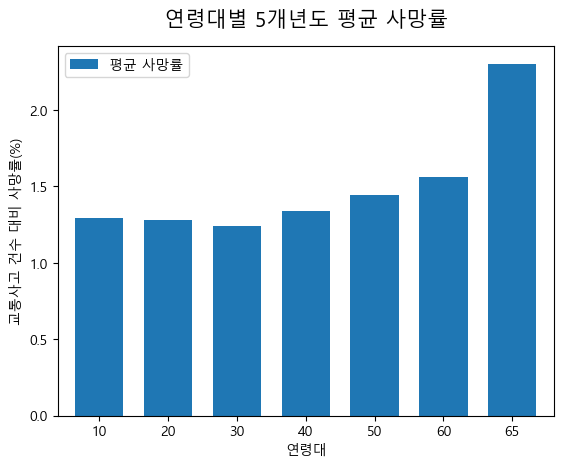

In [36]:
dead_rate_df["dead_rate"].plot(kind="bar", width=0.7)
plt.title("연령대별 5개년도 평균 사망률", size=15, pad=15)
plt.xlabel("연령대")
plt.ylabel("교통사고 건수 대비 사망률(%)")
plt.xticks(rotation=0)
plt.legend(["평균 사망률"], loc="best")
plt.savefig("./result/traffic_accident_dead_rate_5_v2.png", bbox_inches='tight')

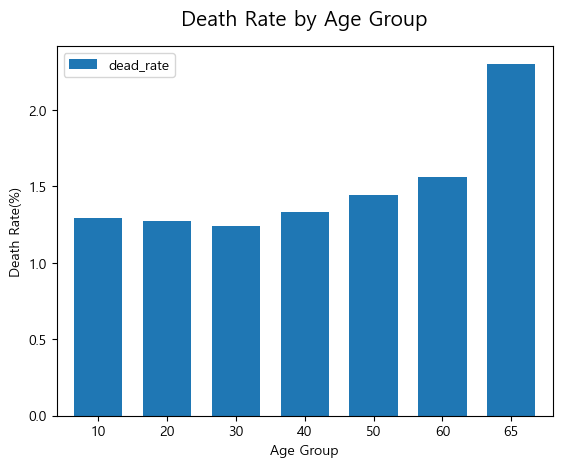

In [35]:
dead_rate_df["dead_rate"].plot(kind="bar", width=0.7)
plt.title("Death Rate by Age Group", size=15, pad=15)
plt.xlabel("Age Group")
plt.ylabel("Death Rate(%)")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.savefig("./result/traffic_accident_dead_rate_5_v1.png", bbox_inches='tight')